In [ ]:
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Decomposition

/var/folders/gb/qpmlzbms1xg5h5tb31c2z73r0000gn/T/ipykernel_95873/2962916843.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date_range = pd.date_range(start='2020-01-01', periods=T, freq='M')


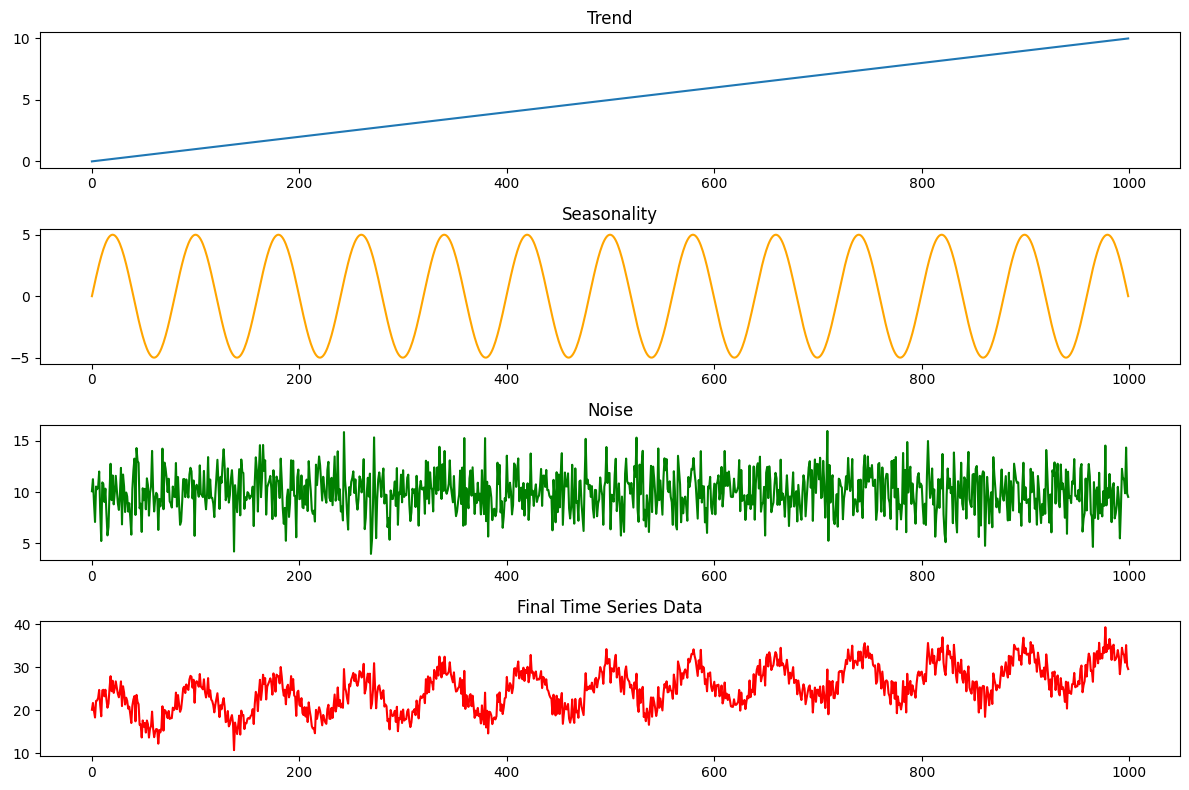

In [75]:
T = 1000

date_range = pd.date_range(start='2020-01-01', periods=T, freq='M')
level = 10
trend = np.linspace(0, 10, T)
seasonality = 5 * np.sin(np.linspace(0, 25 * np.pi, T))
noise = np.random.normal(loc=10, scale=2, size=T)

data = level + trend + seasonality + noise

plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(trend, label='Trend')
plt.title('Trend')

plt.subplot(4, 1, 2)
plt.plot(seasonality, label='Seasonality', color='orange')
plt.title('Seasonality')

plt.subplot(4, 1, 3)
plt.plot(noise, label='Noise', color='green')
plt.title('Noise')

plt.subplot(4, 1, 4)
plt.plot(data, label='Time Series Data', color='red')
plt.title('Final Time Series Data')

plt.tight_layout()
plt.show()


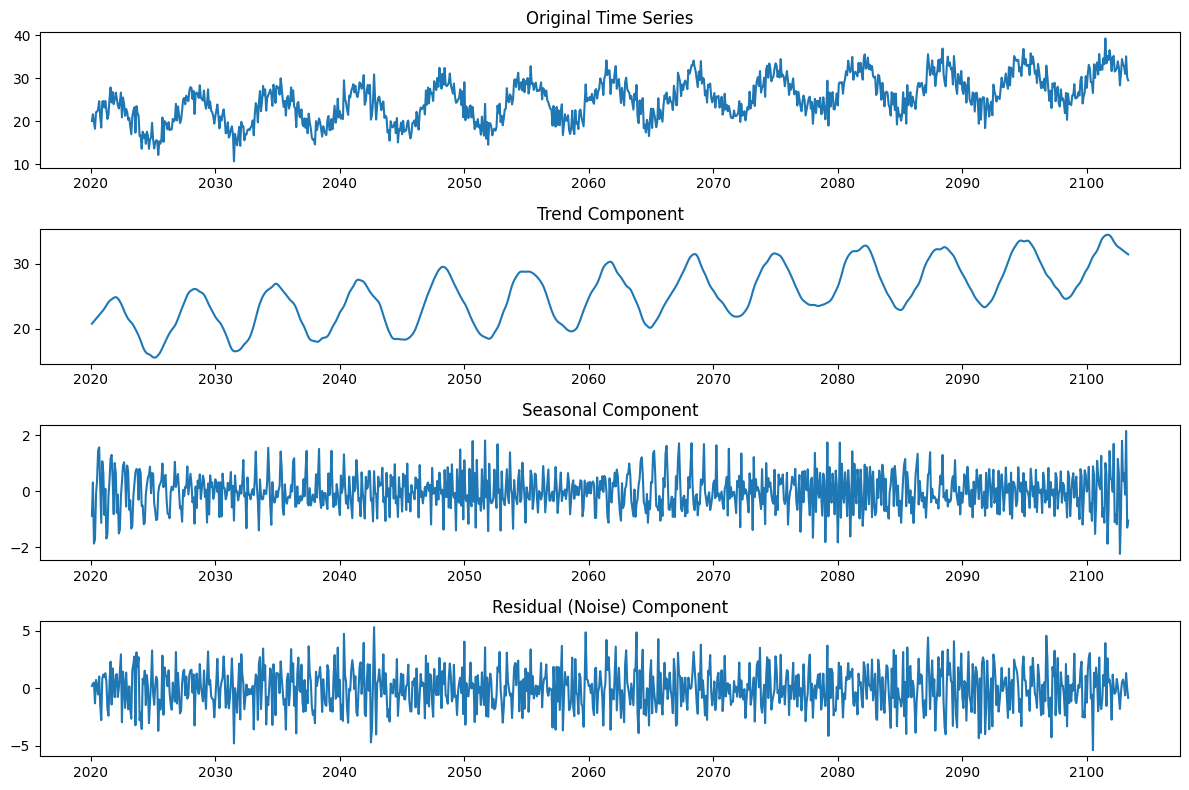

In [76]:
from statsmodels.tsa.seasonal import STL


df = pd.DataFrame({'Date': date_range, 'Value': data})
df.set_index('Date', inplace=True)

stl = STL(df['Value'], seasonal=13)
result = stl.fit()

# Plot the decomposed components
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(df['Value'], label='Original')
plt.title('Original Time Series')

plt.subplot(412)
plt.plot(result.trend, label='Trend')
plt.title('Trend Component')

plt.subplot(413)
plt.plot(result.seasonal, label='Seasonality')
plt.title('Seasonal Component')

plt.subplot(414)
plt.plot(result.resid, label='Residuals')
plt.title('Residual (Noise) Component')

plt.tight_layout()
plt.show()